In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import csv
import missingno as msno

In [3]:
# original dataset
# df_main = pd.read_csv(r'C:\Users\triti\Downloads\globalterrorismdb_0617dist.csv\globalterrorismdb_0617dist.csv', encoding = "ISO-8859-1")
# msno.matrix(df_main)

In [10]:
# Loading dataset after removing columns with more than 15% and rows with more than 5% missing data
df = pd.read_excel(r'C:\Users\triti\Downloads\GTD_modified_rowsremoved2.xlsx', index_col = 0)
df.head()

,iyear,country,country_txt,region,region_txt,city,vicinity,crit1,crit2,crit3,...,gname,individual,weaptype1,weaptype1_txt,nkill,nwound,property,ishostkid,INT_MISC,INT_ANY
0,1970,217,United States,1,North America,Cairo,0,1.0,1.0,1.0,...,Black Nationalists,0,5,Firearms,0.0,0.0,1.0,0.0,0,-9
1,1970,218,Uruguay,3,South America,Montevideo,0,1.0,1.0,1.0,...,Tupamaros (Uruguay),0,5,Firearms,0.0,0.0,0.0,0.0,0,0
2,1970,217,United States,1,North America,Oakland,0,1.0,1.0,1.0,...,Unknown,0,6,Explosives,0.0,0.0,1.0,0.0,0,-9
3,1970,217,United States,1,North America,Madison,0,1.0,1.0,1.0,...,New Year's Gang,0,8,Incendiary,0.0,0.0,1.0,0.0,0,0
4,1970,217,United States,1,North America,Madison,0,1.0,1.0,1.0,...,New Year's Gang,0,8,Incendiary,0.0,0.0,1.0,0.0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152492 entries, 0 to 152491
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            152492 non-null  int64  
 1   country          152492 non-null  int64  
 2   country_txt      152492 non-null  object 
 3   region           152492 non-null  int64  
 4   region_txt       152492 non-null  object 
 5   city             152230 non-null  object 
 6   vicinity         152492 non-null  int64  
 7   crit1            150827 non-null  float64
 8   crit2            151677 non-null  float64
 9   crit3            137189 non-null  float64
 10  multiple         152491 non-null  float64
 11  success          152492 non-null  int64  
 12  suicide          152492 non-null  int64  
 13  attacktype1      152492 non-null  int64  
 14  attacktype1_txt  152492 non-null  object 
 15  targtype1        148244 non-null  float64
 16  targtype1_txt    152492 non-null  obje

<AxesSubplot:>

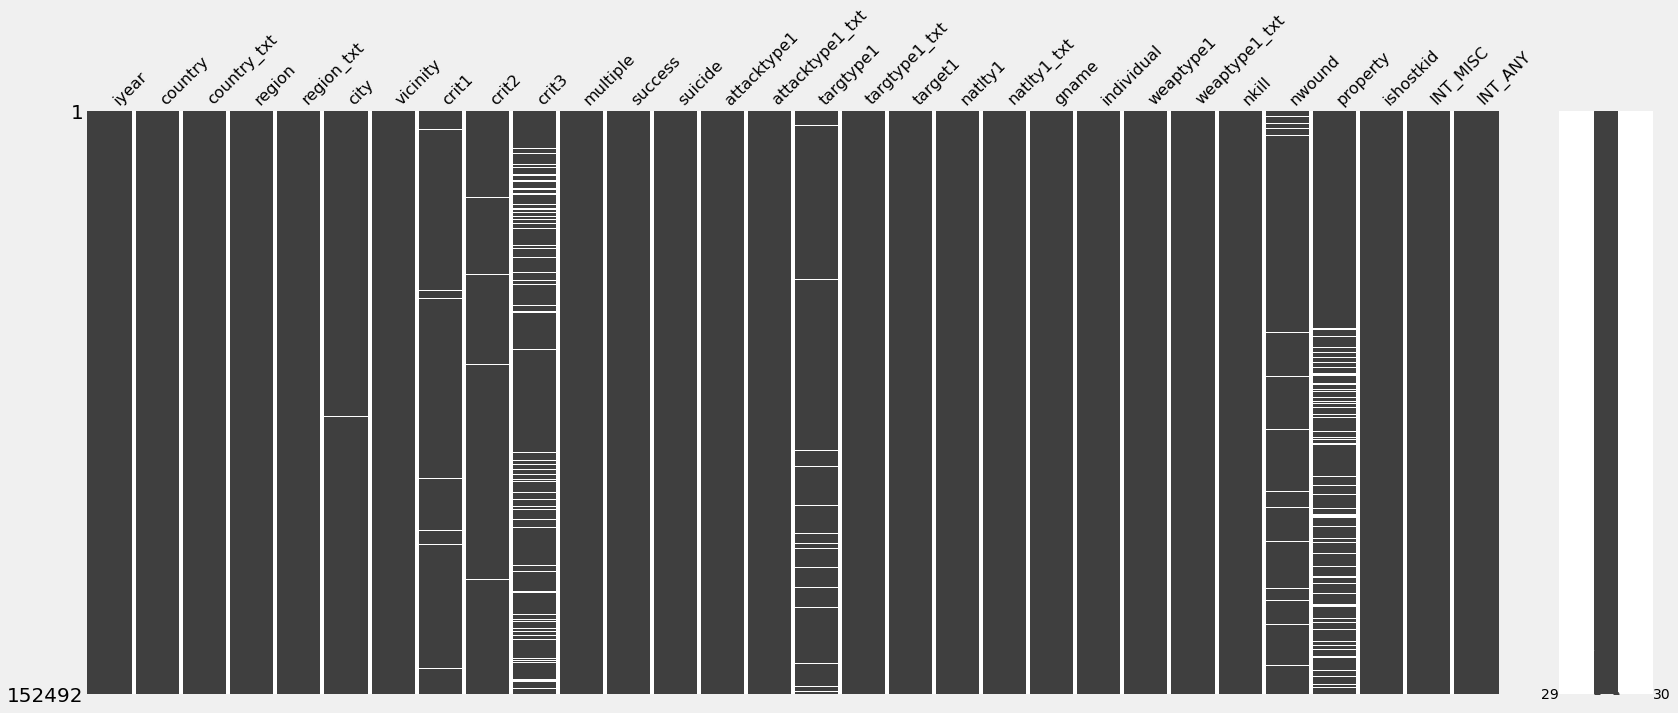

In [4]:
msno.matrix(df) 

## Data Cleaning

In [15]:
# Outlier detection and removal using IQR                                                                      
# IQR
Q1 = np.percentile(df['nkill'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['nkill'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['nkill'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['nkill'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df['nkill'].shape)

Old Shape:  (152492, 30)
New Shape:  (152492,)


##  Handling missing values

In [5]:
#Replacing encoded unknown values with NaN and visualising that                                                 
df = df.replace({
"property":-9, "INT_LOG":-9, "INT_MISC":-9, "INT_IDEO":-9, "INT_NE":-9,
"attacktype1":9, "targtype1":20,"weaptype1":13,
"crit1":0,"crit2":0,"crit3":0,
"doubtterr":1,"ishostkid":-9,
"attacktype1_txt" : 'Unknown',
"targtype1_txt" : 'Unknown',
"weaptype1_txt" : 'Unknown',
"country":'Unknown',
"region" : 'Unknown',
"gname":'Unknown',
},np.NaN)

In [6]:
#Checking the count and percentage of missing values in all columns by contributor ritika tiwari
nmiss = df.isna().sum().sort_values(ascending = False)
missing_percentages = (df.isna().sum().sort_values(ascending = False)/len(df))*100

data = {'Count':nmiss,'Percentage':missing_percentages}
columns = df.columns

miss_df = pd.DataFrame(data, columns)
miss_df.sort_values(['Percentage'], ascending=False)

,Count,Percentage
gname,73500,48.199250
property,15392,10.093644
crit3,15303,10.035281
targtype1_txt,4248,2.785720
targtype1,4248,2.785720
nwound,3697,2.424389
crit1,1665,1.091861
crit2,815,0.534454
target1,338,0.221651
nkill,319,0.209191


In [7]:
#Dropping columns with more than 15% missing values 
list_empty_columns = list(missing_percentages[missing_percentages > 0.15].index.values)
df.drop(list_empty_columns,inplace=True,axis=1)

In [58]:
# Function to remove missing values row-wise:

# def divide_dataframe5per(a,b):
# temp_df = df.iloc[a:b]
# for i in range(a,b):
# print("Nan in row ", i , " : " , df.iloc[i].isnull().sum()/len(df.columns))
# if (df.iloc[i].isnull().sum()/len(df.columns) > 0.05):
# temp_df.drop([i],axis=0,inplace=True)
# else:
# pass
# temp_df01 = temp_df.copy()
# return temp_df01


# temp_df21=divide_dataframe5per(0,25000)
# temp_df22=divide_dataframe5per(25000,50000)
# temp_df23=divide_dataframe5per(50000, 75000)
# temp_df24=divide_dataframe5per(75000,100000)
# temp_df25=divide_dataframe5per(125000,150000)
# temp_df26=divide_dataframe5per(175000,181696)

# modified_df2 = pd.concat([temp_df21,temp_df22,temp_df23,temp_df24,temp_df25,temp_df26], axis=0)



In [11]:
# imputing categorical variable 'property'
df['property'].fillna(df['property'].mode().iloc[0], inplace=True)

In [12]:
# Finding correlated variables 
correlations = df.corr().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'nkill' & col2 != 'v2'") # Filter by variable

,col1,col2,correlation
11,nkill,nkill,1.000000
21,nkill,nwound,0.561230
42,nkill,suicide,0.158253
76,nkill,INT_ANY,0.067686
89,nkill,success,0.059666
105,nkill,property,0.040664
108,nkill,ishostkid,0.037242
122,nkill,region,0.033498
147,nkill,targtype1,0.022991
170,nkill,vicinity,0.010631


In [20]:
# imputing numerical variable 'nkill'
df['nkill'].fillna(df['nkill'].std(axis = 0, skipna = True), inplace=True)
df['nwound'].fillna(df['nwound'].std(axis = 0, skipna = True), inplace=True)

# checking correlation for verification
df['nkill'].corr(df['nwound'])

0.538475055348289

## Region-wise Analysis

In [21]:
print('Country with Highest Terrorist Attacks:',df['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['region_txt'].value_counts().index[0])
print('Most prominent type of attack:',df['attacktype1_txt'].value_counts().index[0])
print('Most prominent target:',df['targtype1_txt'].value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Most prominent type of attack: Bombing/Explosion
Most prominent target: Private Citizens & Property


In [22]:
# Exploring the highest attacked region in the world
max_region = df[df['region_txt']=='Middle East & North Africa']
print('Top 5 gangs in the region:')
print(max_region['gname'].value_counts()[:5])
print(" ")
print('Top 5 countries attacked within the region:')
print(max_region['country_txt'].value_counts()[:5])
print(" ")
print('Top 5 attack types in the region:')
print(max_region['attacktype1_txt'].value_counts()[:5])

Top 5 gangs in the region:
Islamic State of Iraq and the Levant (ISIL)    3971
Kurdistan Workers' Party (PKK)                 1844
Palestinians                                    913
Al-Qaida in the Arabian Peninsula (AQAP)        769
Houthi extremists (Ansar Allah)                 617
Name: gname, dtype: int64
 
Top 5 countries attacked within the region:
Iraq       22367
Turkey      3771
Yemen       2341
Algeria     2303
Egypt       2238
Name: country_txt, dtype: int64
 
Top 5 attack types in the region:
Bombing/Explosion                 28682
Armed Assault                      8593
Assassination                      3783
Hostage Taking (Kidnapping)        1095
Facility/Infrastructure Attack      929
Name: attacktype1_txt, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='decade', ylabel='count'>

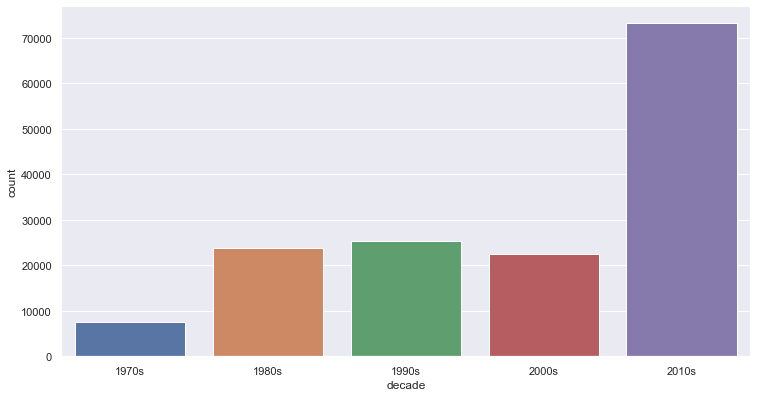

In [10]:
# terrorist activities over the decades
def get_decade(year):
    period_start = int(year/10)*10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['iyear'].apply(get_decade)

sns.set(rc = {'figure.figsize':(11,6)})
sns.countplot(df['decade'])

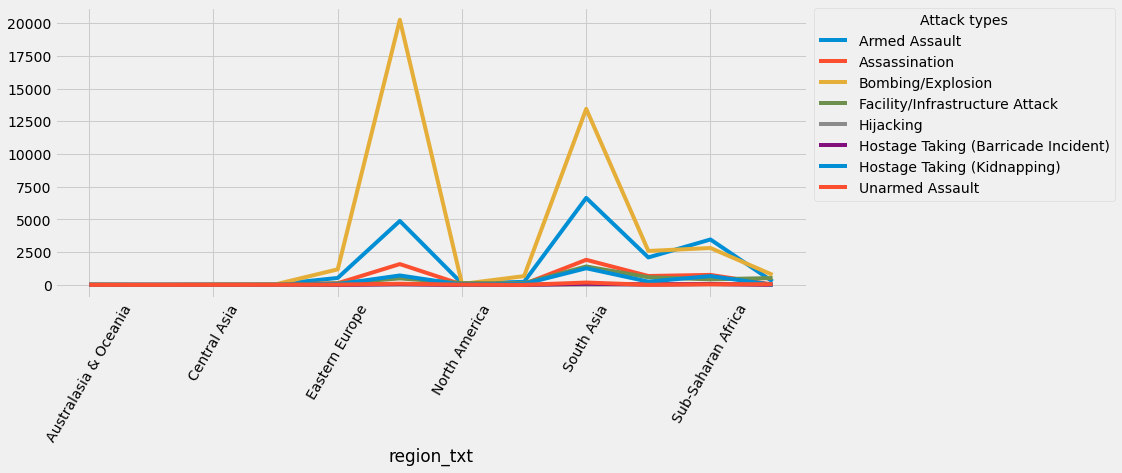

In [3]:
# Count of different types of attack types that occurred in all the regions beyon 2010
yr = df[df['iyear'] >= 2010]
reg_atype = pd.crosstab(yr.region_txt, yr.attacktype1_txt)
reg_atype.head()

pl = reg_atype.plot(kind="line", stacked=False, rot=0)

plt.xticks(rotation=60)
fig=plt.gcf()
fig.set_size_inches(12,5)

pl.legend(title='Attack types', bbox_to_anchor=(1, 1.02), loc='upper left')

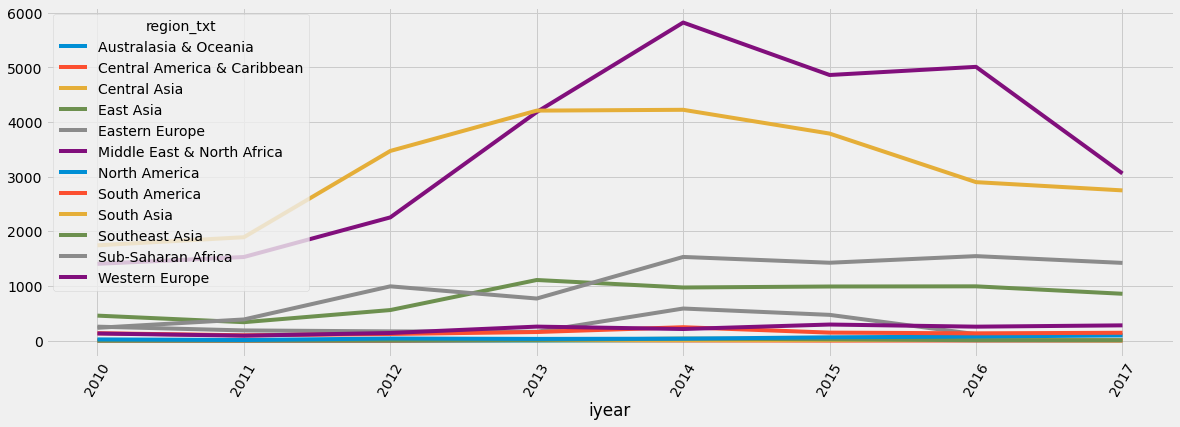

In [124]:
# Was there any property damage due to different attack types?
pdmg = pd.crosstab( yr.iyear,yr.region_txt)
# pdmg.head()
pl = pdmg.plot(kind="line", stacked=False, rot=0)

plt.xticks(rotation=60)

fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()
pl.legend(title='Property Damage', bbox_to_anchor=(1, 1.02), loc='upper left')

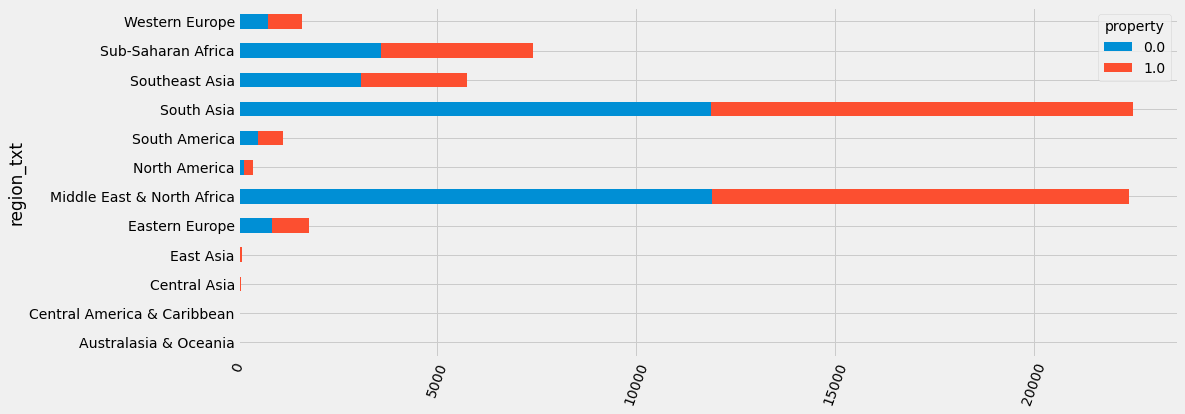

In [125]:
# Region-wise property damage
pdmg_region = pd.crosstab(yr.region_txt,yr.property)
pdmg_region

pr = pdmg_region.plot.barh(stacked=True)
plt.xticks(rotation=70)

fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

# plt.title('Property Damage due to different attack types')
pl.legend(title='Property Damage by Region', bbox_to_anchor=(1, 1.02))

#### Exploring terrorism in India

In [47]:
ind = df[df['country_txt']=='India']
print('Most prominent type of attack:',ind['attacktype1_txt'].value_counts().index[0])
print('Top 5 gangs in India:')
print(ind['gname'].value_counts()[:5])
print(" ")
print('Top 5 targets within the country:')
print(ind['targtype1_txt'].value_counts()[:5])
print(" ")
print('Top 5 attack types in the country:')
print(ind['attacktype1_txt'].value_counts()[:5])

Most prominent type of attack: Bombing/Explosion
Top 5 gangs in India:
Communist Party of India - Maoist (CPI-Maoist)    1646
Maoists                                           1255
Sikh Extremists                                    636
United Liberation Front of Assam (ULFA)            334
Hizbul Mujahideen (HM)                             191
Name: gname, dtype: int64
 
Top 5 targets within the country:
Private Citizens & Property    2720
Police                         2171
Government (General)           1538
Business                       1003
Military                        810
Name: targtype1_txt, dtype: int64
 
Top 5 attack types in the country:
Bombing/Explosion                 4682
Armed Assault                     3078
Assassination                     1086
Facility/Infrastructure Attack     928
Hostage Taking (Kidnapping)        736
Name: attacktype1_txt, dtype: int64


In [27]:
yr = df[df['iyear'] >= 2010]
top = pd.DataFrame(yr['country_txt'].value_counts().head(25).index.tolist())
free = pd.DataFrame(yr['country_txt'].value_counts().tail(20).index.tolist())

In [28]:
ind = df[df['country_txt'] == 'India']
ind2 = ind[(ind['iyear'] >= 2010)]
top = pd.DataFrame(ind2['gname'].value_counts().head(20).index.tolist())

There are 676 words in the combination of all cells in column imonth.


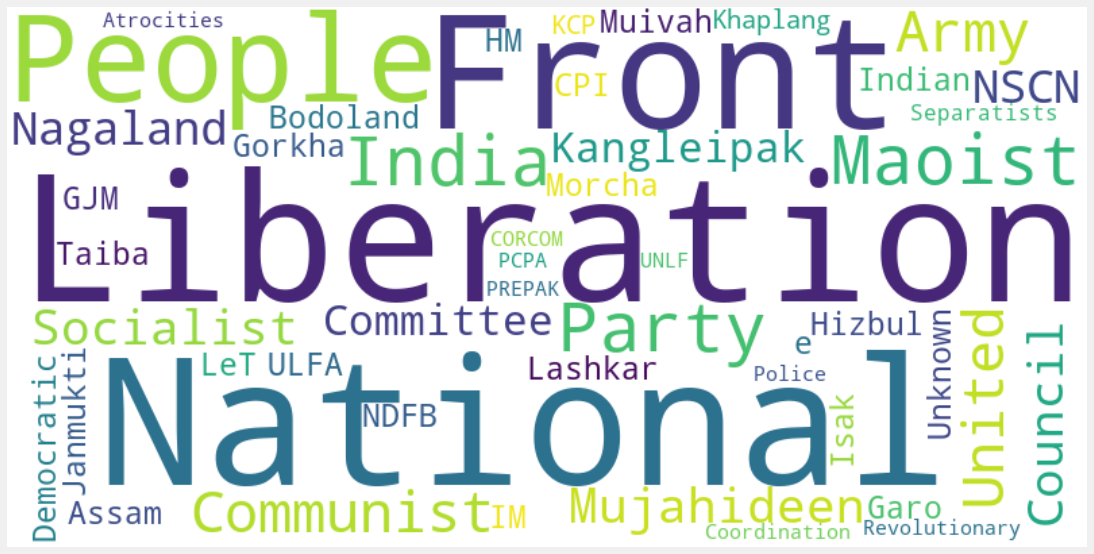

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image

text = " ".join(value for value in top[0].values.astype(str))
print ("There are {} words in the combination of all cells in column imonth.".format(len(text)))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.axis("off")
fig=plt.gcf()
fig.set_size_inches(15,8)

plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Analysis conducted by Vishal-rao:

<AxesSubplot:xlabel='iyear'>

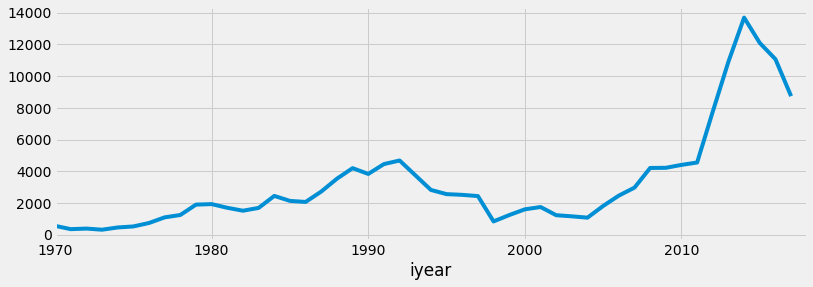

In [46]:
# Trend in terrorist attacks over the years
year_wise = df.groupby('iyear').size()
plt.subplots(figsize=(12,4))
plt.xlim([1970, 2018])
year_wise.plot()

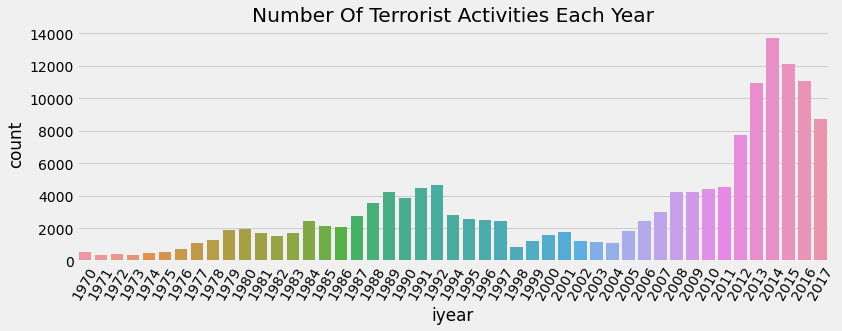

In [45]:
# What is the change in number of terrorist activities over the years?
plt.subplots(figsize=(12,4))
sns.countplot(x = 'iyear', data = df)
plt.xticks(rotation=60)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Text(0.5, 1.0, 'Gang responsible for most number of kils and wounds')

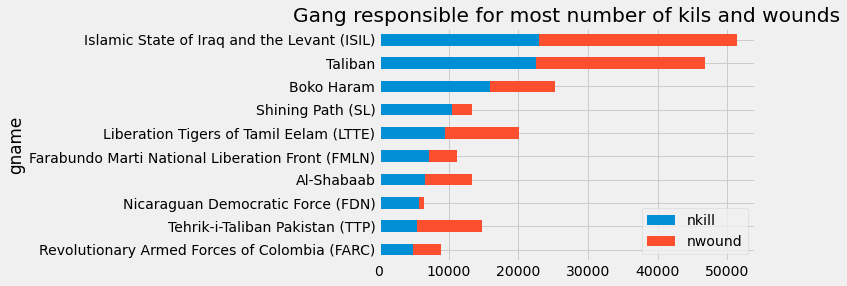

In [22]:
# gangs with most number of kills and wounded
gangs = df[df['gname'] != 'Unknown']
l = gangs.groupby('gname').agg({'nkill':'sum','nwound':'sum'}).sort_values(by=['nkill'],ascending=True)
lkill_wound=l[(l['nkill']>=4500)]
lkill_wound.plot.barh(stacked=True)
plt.title('Gang responsible for most number of kils and wounds')

Text(0.5, 1.0, 'Most active gangs from 1970 to 2009')

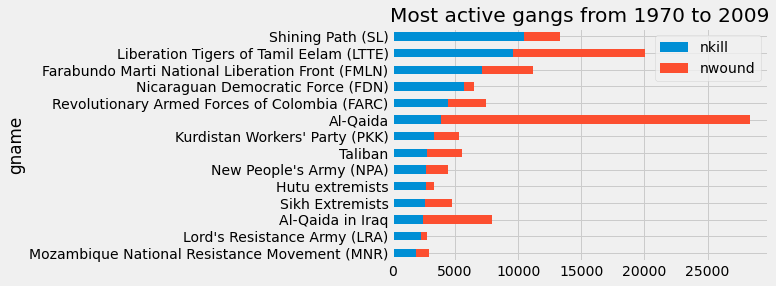

In [16]:
#The most active gang in kills and wounds from 1970 to 2009
gangs_b_2000 = gangs[gangs['iyear']<= 2009]
kw_past = gangs_b_2000.groupby('gname').agg({'nkill':'sum','nwound':'sum'}).sort_values(by=['nkill'],ascending=True)
kwp_kill_wound=kw_past[(kw_past['nkill']>=1800)]
kwp_kill_wound.plot.barh(stacked=True)
plt.title('Most active gangs from 1970 to 2009')

Text(0.5, 1.0, 'Gangs most active after 2010')

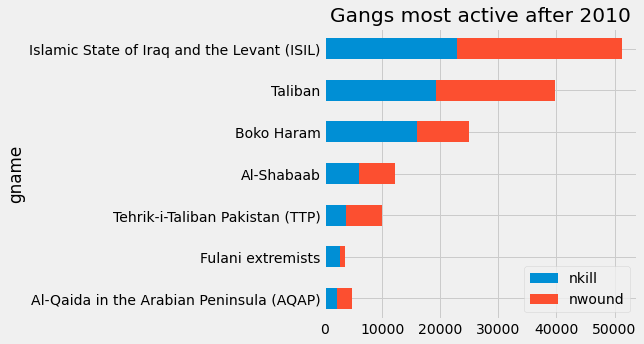

In [20]:
# Gangs Active After 2010
gangs_p_2010 = gangs[gangs['iyear']> 2010]
kw_past2010 = gangs_p_2010.groupby('gname').agg({'nkill':'sum','nwound':'sum'}).sort_values(by=['nkill'],ascending=True)
kwp_kill_wound2010=kw_past2010[(kw_past2010['nkill']>=1800)]
kwp_kill_wound2010.plot.barh(stacked=True,figsize=(5,5))
plt.title('Gangs most active after 2010')

Text(0.5, 1.0, 'Gangs and their most prefered target and weapons')

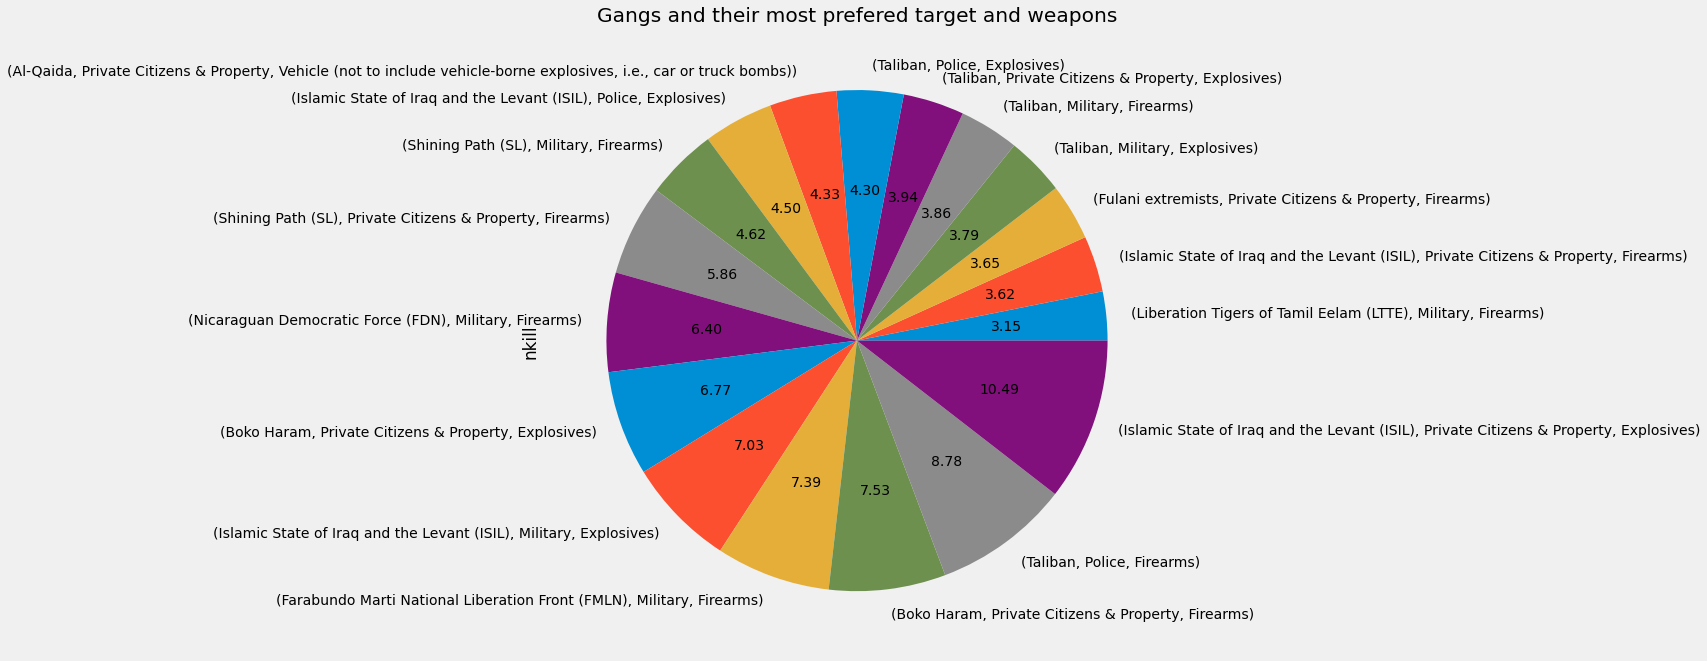

In [30]:
# Weapons used by gangs in attacks with more than 2000 kills
name_targ_weap = df[df['gname']!='Unknown'].groupby(['gname','targtype1_txt','weaptype1_txt']).agg({'nkill':'sum'}).sort_values(by=['nkill'],ascending=True)
name_targ_weap1 = name_targ_weap[name_targ_weap['nkill']>2000]
name_targ_weap1.plot.pie(y='nkill',autopct="%.2f",figsize=(10,15),legend=False);
plt.title('Gangs and their most prefered target and weapons')


Text(0.5, 1.0, 'Cities with most number of kills in India and the groups responsible')

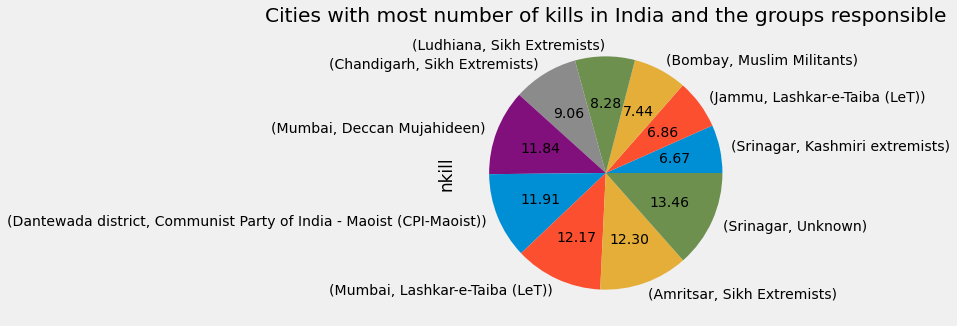

In [17]:
#10 Most attacked cities with more no of kills and group that attacked in india
df_india=df[df['country_txt']=='India']
df_india = df_india[df_india['city'] !='Unknown']

ind_gp = df_india.groupby(['city','gname']).agg({'nkill':'sum'}).sort_values(by=['nkill'],ascending=True)
ind_gp1=ind_gp[ind_gp['nkill']>100]
ind_gp1.plot.pie(y='nkill',autopct="%.2f",figsize=(5,5),legend=False);
plt.title('Cities with most number of kills in India and the groups responsible')


#### Analysis conducted by Contributer 3:

<AxesSubplot:xlabel='attacktype1_txt'>

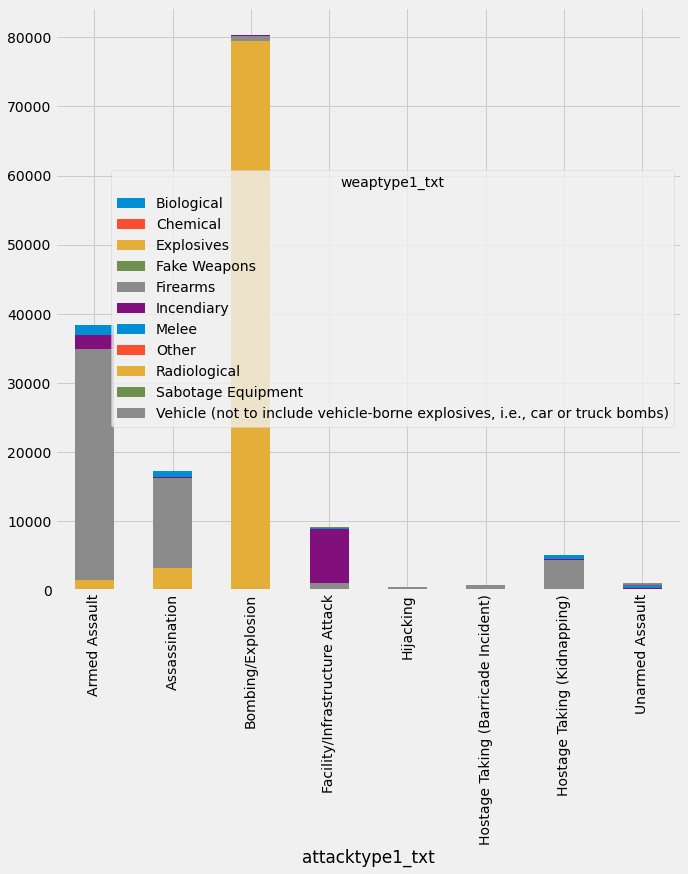

In [29]:
# visualizing weapons with respect to attack types
attacktype_weapontype_table = pd.crosstab(index= df["attacktype1_txt"], columns=df["weaptype1_txt"])
attacktype_weapontype_table

attacktype_weapontype_table.plot(kind="bar",figsize=(10,10),stacked=True)

In [31]:
#visualizing weapons with respect to target type
targettype_weapontype_table = pd.crosstab(index = df["targtype1_txt"], columns = df["weaptype1_txt"])
targettype_weapontype_table

weaptype1_txt,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
targtype1_txt,,,,,,,,,,,
Abortion Related,0,1,47,0,20,186,6,0,0,0,0
Airports & Aircraft,1,3,753,19,201,95,33,0,0,3,0
Business,5,23,11253,3,3642,2654,182,12,0,16,6
Educational Institution,1,46,2198,0,949,596,66,11,0,2,3
Food or Water Supply,0,12,174,0,50,20,1,0,1,0,0
Government (Diplomatic),1,13,1682,1,998,282,63,3,0,1,4
Government (General),14,35,9137,5,7951,1269,307,10,10,5,17
Journalists & Media,6,6,777,0,1265,172,110,8,1,3,2
Maritime,0,0,108,0,130,7,5,0,0,1,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



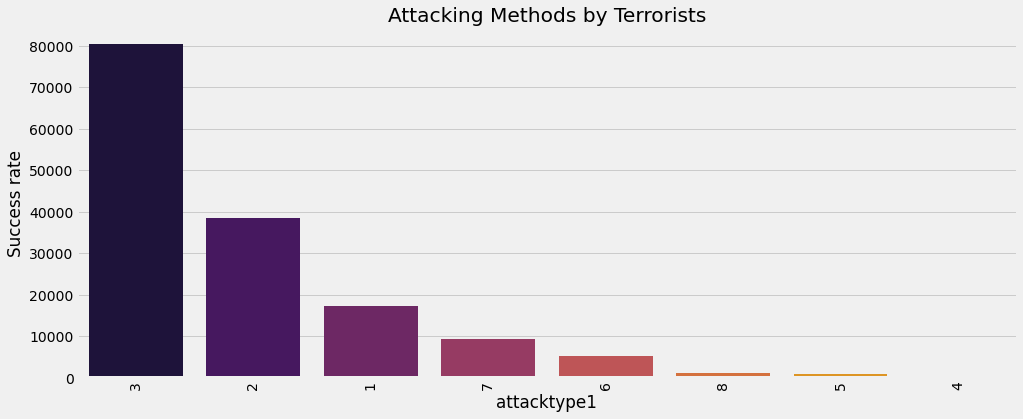

In [32]:
# relation between attacks and their success rates
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1',data=df,palette='inferno',order=df['attacktype1'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("Success rate")
plt.title('Attacking Methods by Terrorists')
plt.show()


Text(0, 0.5, 'Attack Type')

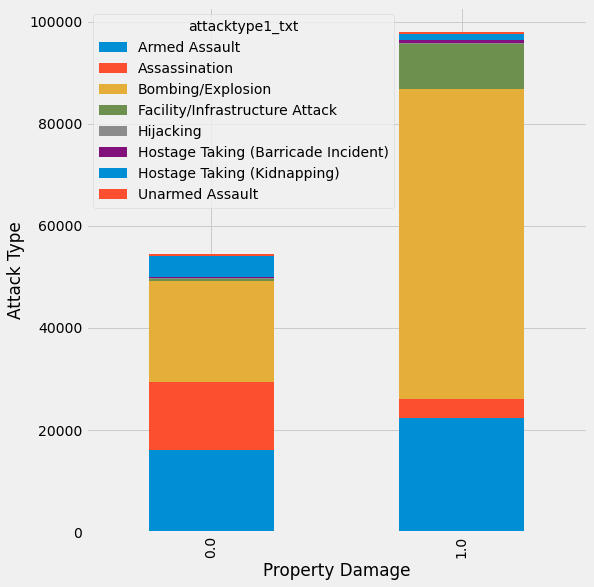

In [39]:
#if attacks are successful which kind of attack has more kills
property_attacktype_table = pd.crosstab(
    index=df["property"], 
    columns=df["attacktype1_txt"])

property_attacktype_table
property_attacktype_table.plot(kind="bar",
                               figsize=(8,9),
                               stacked=True)
plt.xlabel("Property Damage")
plt.ylabel("Attack Type")

Note: here as the property variable is a categorical variable:
1 = "Yes" The incident resulted in property damage.
0 = "No" The incident did not result in property damage

Text(0, 0.5, 'Weapon Type')

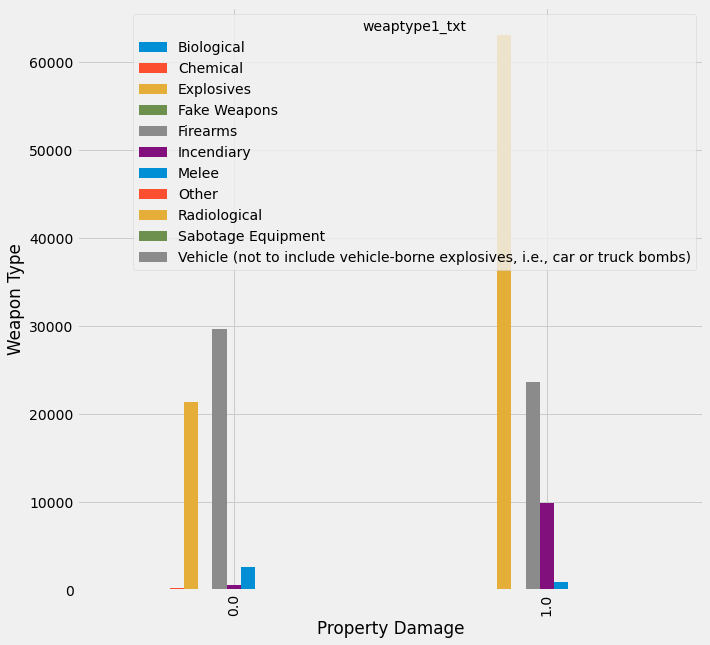

In [41]:
#visualizing property damage with respect to weapon type
property_attacktype_table = pd.crosstab(index=df["property"], columns=df["weaptype1_txt"])
property_attacktype_table
property_attacktype_table.plot(kind="bar",figsize=(10,10),stacked=False)
plt.xlabel("Property Damage")
plt.ylabel("Weapon Type")

#### End of notebook